In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from glob import glob
import os
from astropy.visualization import ZScaleInterval, ImageNormalize, LogStretch, AsymmetricPercentileInterval
import h5py 
from astropy.nddata import CCDData
import astropy.constants as const
from PIL import Image
from datetime import datetime, timedelta
from ccdproc import ImageFileCollection
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
from matplotlib import patches
from matplotlib.markers import MarkerStyle
import cmcrameri.cm as cmcm
import cmasher as cmr
from scipy import ndimage
from scipy.io import readsav
import copy
from juanfit import SpectrumFitSingle, SpectrumFitRow, gaussian

In [2]:
green_path = "../../src/EclipseSpectra2017/MikesData_l1/Green/"
red_path = "../../src/EclipseSpectra2017/MikesData_l1/Red/"

green_fname = "TotalitySequenceGreen_22711(2)_l1.fit"
red_fname = "TotalitySequenceRed_7715_l1.fit"

In [42]:
green_frame = CCDData.read(os.path.join(green_path, green_fname),unit="adu")
red_frame = CCDData.read(os.path.join(red_path, red_fname),unit="adu")
green_image = green_frame.data/green_frame.header["EXPTIME"]
red_image = red_frame.data/red_frame.header["EXPTIME"]
green_wavelength = CCDData.read(os.path.join(green_path,green_fname),hdu=1,unit="angstrom").data
red_wavelength = CCDData.read(os.path.join(red_path,red_fname),hdu=1,unit="angstrom").data
green_xpixel_array = np.arange(green_frame.header["XWS"],green_frame.header["XWS"]+green_frame.header["NAXIS1"])
red_xpixel_array = np.arange(red_frame.header["XWS"],red_frame.header["XWS"]+red_frame.header["NAXIS1"])

In [7]:
norm_green = ImageNormalize(green_image,stretch=LogStretch())
norm_red = ImageNormalize(red_image,stretch=LogStretch())

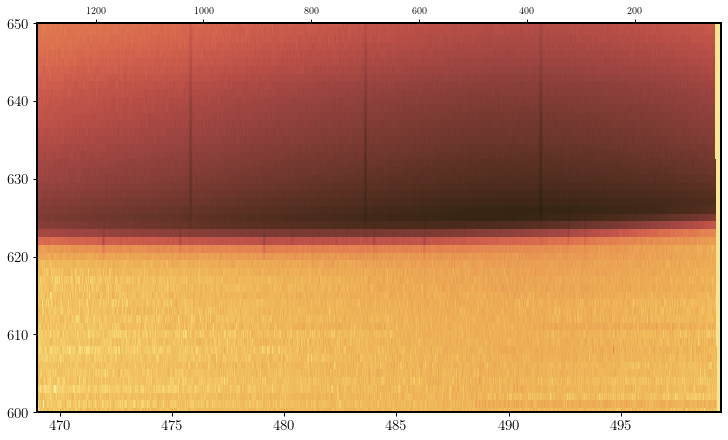

In [14]:
fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
im_green = ax.pcolormesh(green_wavelength/68./10.,np.arange(green_frame.header["NAXIS2"]) + green_frame.header["YWS"],
                        green_image,cmap=cmcm.lajolla,norm=norm_green,shading='auto',rasterized=True)

ax_2 = ax.twiny()
ax_2.set_xlim((green_frame.header["NAXIS1"]-0.5,green_frame.header["XWS"]-0.5))
ax.set_ylim(600,650)
ax.tick_params(labelsize=15)

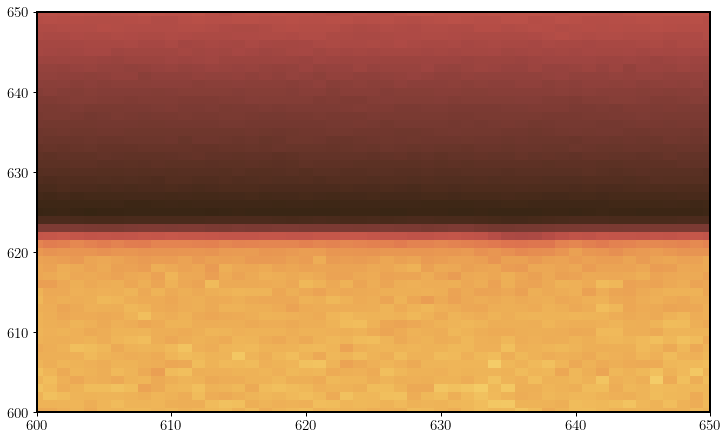

In [29]:
fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
im_green = ax.pcolormesh(np.arange(green_frame.header["XWS"],green_frame.header["XWS"]+green_frame.header["NAXIS1"]),
                np.arange(green_frame.header["NAXIS2"]) + green_frame.header["YWS"],
                        green_image,cmap=cmcm.lajolla,norm=norm_green,shading='auto',rasterized=True)


ax.set_ylim(600,650)
ax.set_xlim(600,650)
# ax.axvline
ax.tick_params(labelsize=15)

In [60]:
Hbeta_wvl = 486.135
HeI_D3_wvl = 587.5621

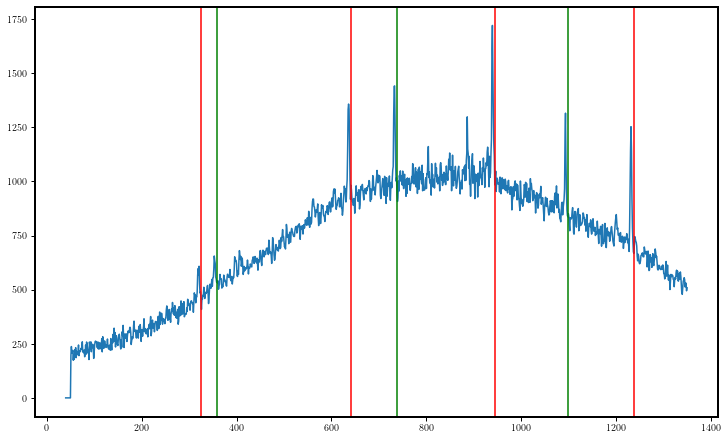

In [59]:
fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(green_xpixel_array,np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],:],axis=0))

for x_pos_ in (324.98,641.55,944.36,1236.286):
    ax.axvline(x_pos_,color="red")

for x_pos_ in (359.27,738.342,1098.72,):
    ax.axvline(x_pos_,color="green")

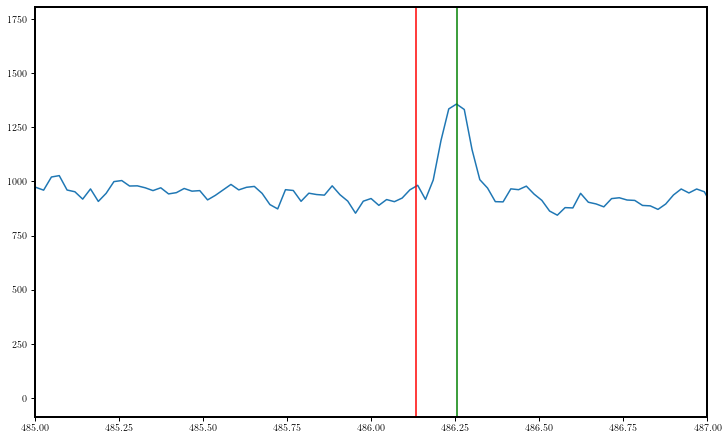

In [36]:

fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(green_wavelength/68./10.,np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],:],axis=0))
ax.set_xlim(485,487)
# ax_2 = ax.twiny()
# ax_2.set_xlim((green_frame.header["NAXIS1"]-0.5,green_frame.header["XWS"]-0.5))
ax.axvline(Hbeta_wvl,color="red")
ax.axvline(486.255,color="green")

Pixel diff: -5.50 
 Wavelength diff: 0.118 nm 72.9 km/s


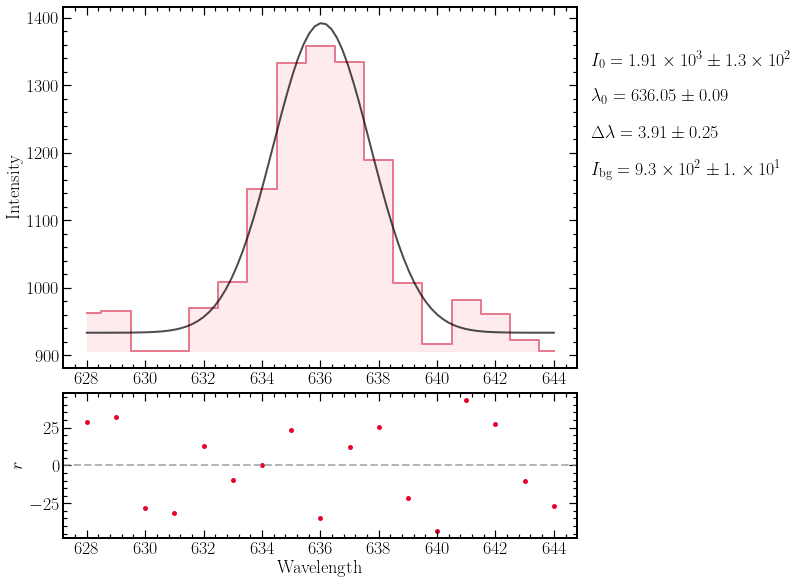

In [47]:
Hbeta_slice_68 = slice(628 - green_frame.header["XWS"],645 - green_frame.header["XWS"])
Hbeta_model_68 = SpectrumFitSingle(data=np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],
                    Hbeta_slice_68],axis=0), 
                    wvl=green_xpixel_array[Hbeta_slice_68],line_number=1,line_wvl_init=[635.],
                    int_max_init=[200],fwhm_init=[1],same_width=False)
Hbeta_model_68.run_lse(absolute_sigma=False)
ax = Hbeta_model_68.plot(plot_fit=True)
Hbeta_pixel_diff_68 = Hbeta_model_68.line_wvl_fit[0] - 641.55
Hbeta_wvl_diff_68 = np.interp(Hbeta_model_68.line_wvl_fit[0], green_xpixel_array, green_wavelength/68./10.) - Hbeta_wvl
print("Pixel diff: {:.2f} \n Wavelength diff: {:.3f} nm {:.1f} km/s".format(Hbeta_pixel_diff_68, 
                                                Hbeta_wvl_diff_68, Hbeta_wvl_diff_68/Hbeta_wvl*3e5))

Pixel diff: -5.11 
 Wavelength diff: 0.106 nm 65.4 km/s


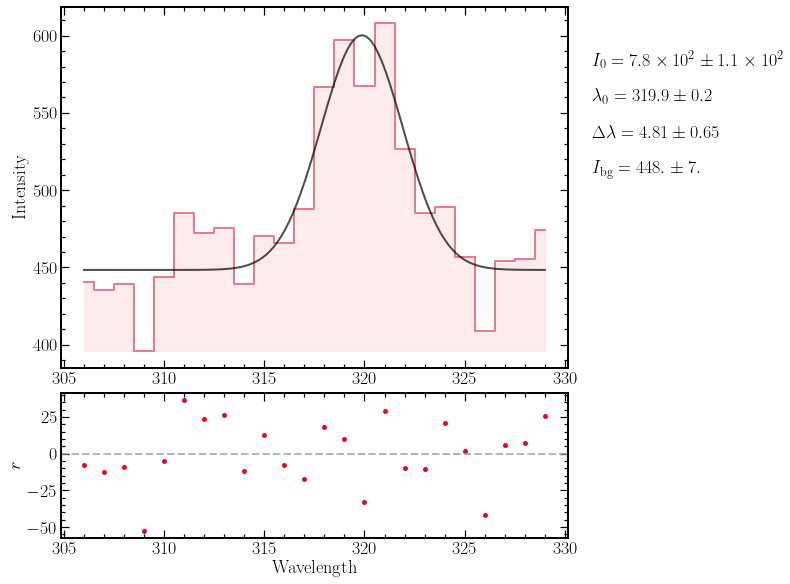

In [48]:
Hbeta_slice_69 = slice(306 - green_frame.header["XWS"],330 - green_frame.header["XWS"])
Hbeta_model_69 = SpectrumFitSingle(data=np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],
                    Hbeta_slice_69],axis=0), 
                    wvl=green_xpixel_array[Hbeta_slice_69],line_number=1,line_wvl_init=[320],
                    int_max_init=[200],fwhm_init=[1],same_width=False)
Hbeta_model_69.run_lse(absolute_sigma=False)
ax = Hbeta_model_69.plot(plot_fit=True)

Hbeta_pixel_diff_69 = Hbeta_model_69.line_wvl_fit[0] - 324.98
Hbeta_wvl_diff_69 = np.interp(Hbeta_model_69.line_wvl_fit[0], green_xpixel_array, green_wavelength/69./10.) - Hbeta_wvl
print("Pixel diff: {:.2f} \n Wavelength diff: {:.3f} nm {:.1f} km/s".format(Hbeta_pixel_diff_69, 
                                                Hbeta_wvl_diff_69, Hbeta_wvl_diff_69/Hbeta_wvl*3e5))

Pixel diff: -5.33 
 Wavelength diff: 0.132 nm 81.2 km/s


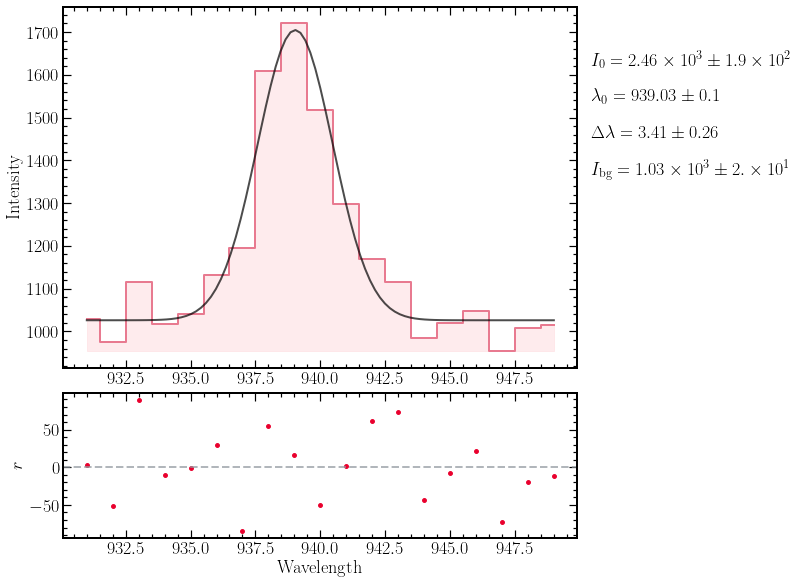

In [50]:
Hbeta_slice_67 = slice(931 - green_frame.header["XWS"],950 - green_frame.header["XWS"])
Hbeta_model_67 = SpectrumFitSingle(data=np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],
                    Hbeta_slice_67],axis=0), 
                    wvl=green_xpixel_array[Hbeta_slice_67],line_number=1,line_wvl_init=[938],
                    int_max_init=[200],fwhm_init=[1],same_width=False)
Hbeta_model_67.run_lse(absolute_sigma=False)
ax = Hbeta_model_67.plot(plot_fit=True)

Hbeta_pixel_diff_67 = Hbeta_model_67.line_wvl_fit[0] - 944.36
Hbeta_wvl_diff_67 = np.interp(Hbeta_model_67.line_wvl_fit[0], green_xpixel_array, green_wavelength/67./10.) - Hbeta_wvl
print("Pixel diff: {:.2f} \n Wavelength diff: {:.3f} nm {:.1f} km/s".format(Hbeta_pixel_diff_67, 
                                                Hbeta_wvl_diff_67, Hbeta_wvl_diff_67/Hbeta_wvl*3e5))

Pixel diff: -5.33 
 Wavelength diff: 0.131 nm 80.8 km/s


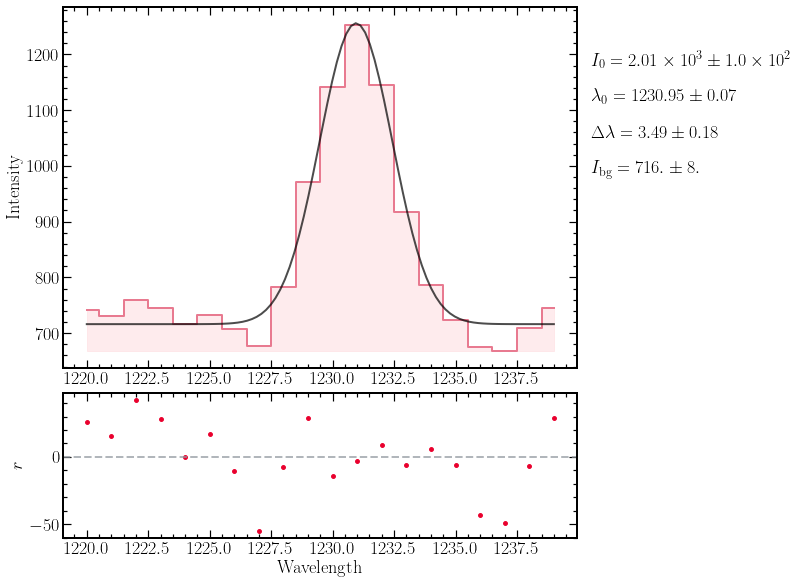

In [52]:
Hbeta_slice_66 = slice(1220 - green_frame.header["XWS"],1240 - green_frame.header["XWS"])
Hbeta_model_66 = SpectrumFitSingle(data=np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],
                    Hbeta_slice_66],axis=0), 
                    wvl=green_xpixel_array[Hbeta_slice_66],line_number=1,line_wvl_init=[1231],
                    int_max_init=[200],fwhm_init=[1],same_width=False)
Hbeta_model_66.run_lse(absolute_sigma=False)
ax = Hbeta_model_66.plot(plot_fit=True)

Hbeta_pixel_diff_66 = Hbeta_model_66.line_wvl_fit[0] - 1236.286
Hbeta_wvl_diff_66 = np.interp(Hbeta_model_66.line_wvl_fit[0], green_xpixel_array, green_wavelength/66./10.) - Hbeta_wvl
print("Pixel diff: {:.2f} \n Wavelength diff: {:.3f} nm {:.1f} km/s".format(Hbeta_pixel_diff_66, 
                                                Hbeta_wvl_diff_66, Hbeta_wvl_diff_66/Hbeta_wvl*3e5))

In [ ]:
HeI_D3_slice_57 = slice(628 - green_frame.header["XWS"],645 - green_frame.header["XWS"])
HeI_D3_model_57 = SpectrumFitSingle(data=np.average(green_image[621 - green_frame.header["YWS"]:623 - green_frame.header["YWS"],
                    HeI_D3_slice_57],axis=0), 
                    wvl=green_xpixel_array[HeI_D3_slice_57],line_number=1,line_wvl_init=[635.],
                    int_max_init=[200],fwhm_init=[1],same_width=False)
# HeI_D3_model_57.run_lse(absolute_sigma=False)
ax = HeI_D3_model_57.plot(plot_fit=True)
HeI_D3_pixel_diff_57 = HeI_D3_model_57.line_wvl_fit[0] - 641.55
HeI_D3_wvl_diff_57 = np.interp(HeI_D3_model_57.line_wvl_fit[0], green_xpixel_array, green_wavelength/57./10.) - HeI_D3_wvl
print("Pixel diff: {:.2f} \n Wavelength diff: {:.3f} nm {:.1f} km/s".format(HeI_D3_pixel_diff_57, 
                                                HeI_D3_wvl_diff_57, HeI_D3_wvl_diff_57/HeI_D3_wvl*3e5))